In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nxviz==0.6.3 networkx

In [1]:
import json
import pandas as pd
from tqdm import tqdm 

import networkx as nx

import nxviz
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

import os, random

In [2]:
NUMBER_OF_SAMPLE_FILES = 2
FILES_DATA_DIR = "/content/data"
PLAYLIST_LIMIT = 100

In [3]:
list_of_files = random.sample(os.listdir(FILES_DATA_DIR),NUMBER_OF_SAMPLE_FILES)
list_of_files

['mpd.slice.257000-257999.json', 'mpd.slice.521000-521999.json']

In [4]:
G = nx.Graph()

In [5]:
for current_file in tqdm(list_of_files):

    parsed_file = json.load(open(os.path.join(FILES_DATA_DIR,current_file)))
    

    for playlist in random.sample(parsed_file["playlists"],PLAYLIST_LIMIT):
        artists = []
        
        for track in playlist['tracks']:

            artists.append(track['artist_name'].replace("$","S")) 

            if not G.has_node(track['artist_name'].replace("$","S")):
                G.add_node(track['artist_name'].replace("$","S"))
                     # artist=track['artist_name'])

        for i,artist_id in enumerate(artists):
            for j,album_id_dest in enumerate(artists):
                
                if  i >= j:
                    continue


                if G.has_edge(artist_id,album_id_dest):
                    G[artist_id][album_id_dest]['weight'] += 1

                else:
                    G.add_edge(artist_id, album_id_dest,weight=1)
        
        

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.26it/s]


In [6]:
prevNode_n = G.number_of_nodes()
prev_edge_n = G.number_of_edges()

print(prevNode_n)
print(prev_edge_n)

3592
222442


In [73]:
nx.write_graphml(G,r"playlists_artists.graphml")

# Network Analysis

## Basics

The Graph is not fully connected so we just gonna get the largest component

In [ ]:
c = max(nx.connected_components(G), key=len)
S = G.subgraph(c).copy()



/tmp/ipykernel_5804/2373427631.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(nodes)


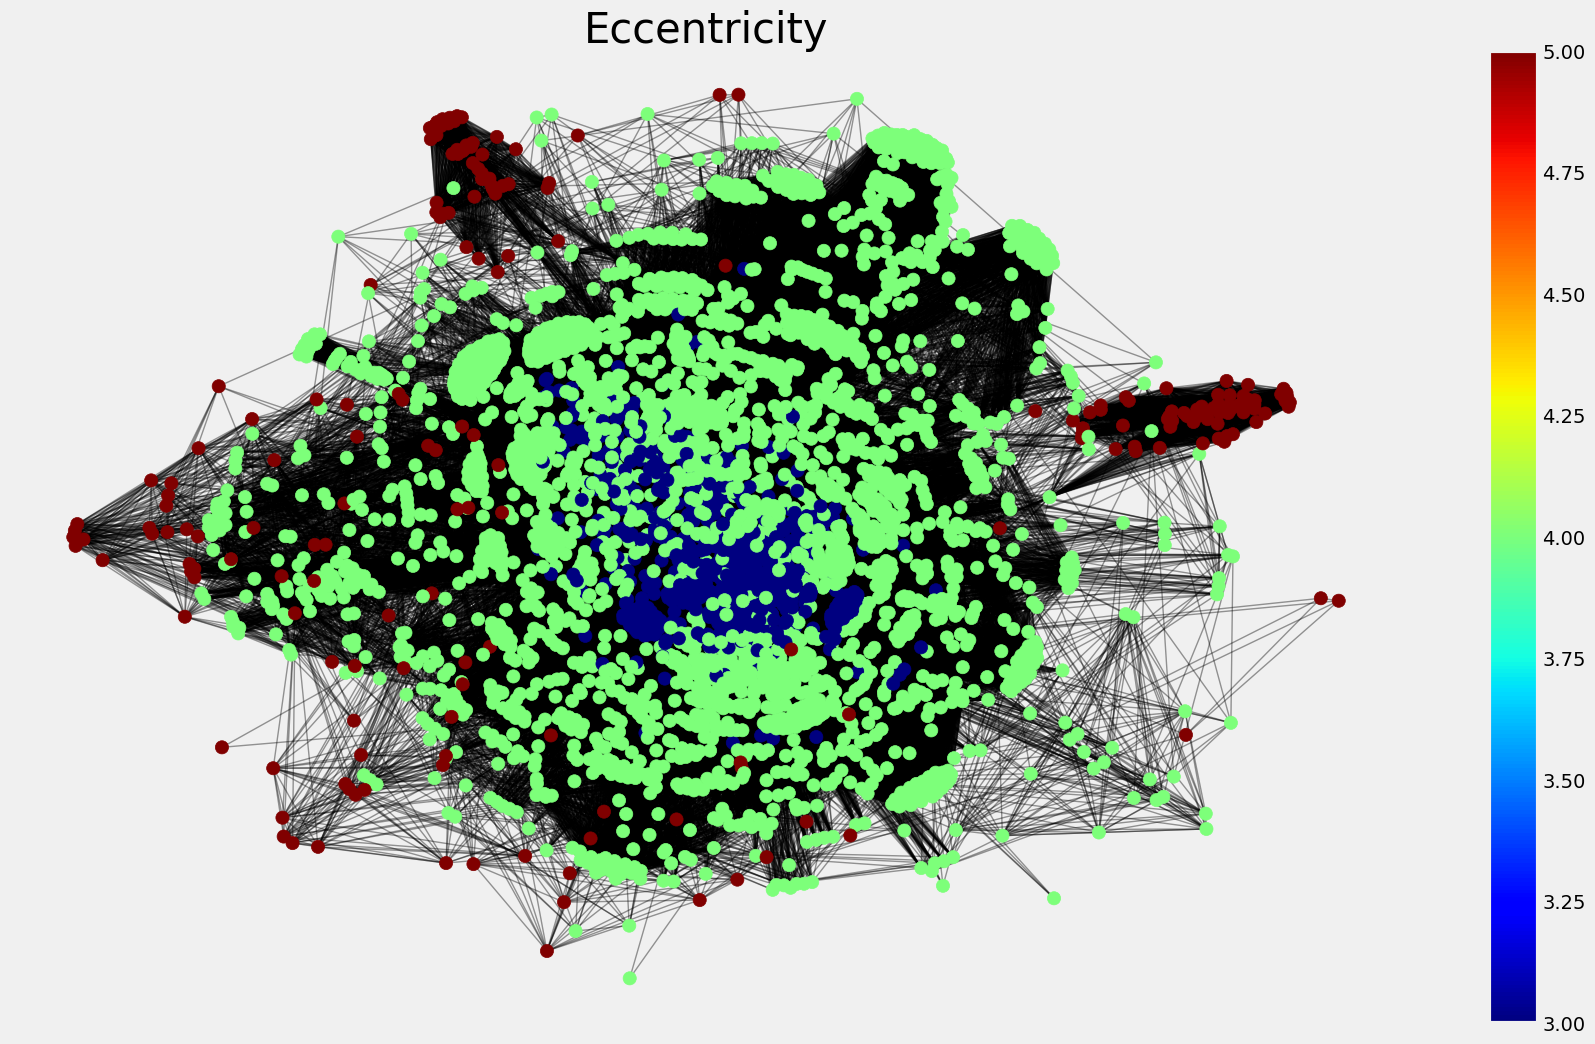

In [61]:
# Excentricity

fig, ax = plt.subplots(1,1,figsize=(20,12))

# layout position
pos_S = nx.spring_layout(g,seed=42223,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(S)).values())

# draw edges
nx.draw_networkx_edges(S,
                       pos=pos_S,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(S,
                 pos=pos_S,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax,node_size=90)

# draw labels
# nx.draw_networkx_labels(G, pos=pos_S,
#                         font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.title("Eccentricity", fontsize = 30)
plt.savefig('imgs/eccentricity.png',dpi=300)
plt.show()

In [ ]:
nx.periphery(S)

In [63]:

sorted_excetricity = dict(sorted(nx.eccentricity(S).items(), key=lambda item: item[1],reverse=True))
sorted_excetricity


{'Sebastian Yatra': 5,
 'Chino & Nacho': 5,
 'Gente De Zona': 5,
 'Fuego': 5,
 'Piso 21': 5,
 'J Alvarez': 5,
 'Carlos Vives': 5,
 'CNCO': 5,
 'Creed Taylor Orchestra': 5,
 'Jimmy Smith': 5,
 'Andrew Hill': 5,
 'Trombone Shorty': 5,
 'Clarence "Gatemouth" Brown': 5,
 'Louis Jordan & His Tympany Five': 5,
 'Pete Fountain': 5,
 'Stanley Turrentine': 5,
 'Les McCann': 5,
 'Michael Brecker': 5,
 'Oliver Nelson': 5,
 'Wild Bill Davison': 5,
 'Will Bernard': 5,
 'Diane Schuur': 5,
 'Leon Redbone': 5,
 'Pee Wee Russell': 5,
 'Charlie Barnet': 5,
 'Jack Teagarden': 5,
 'Nicholas Payton': 5,
 'Al Hirt': 5,
 'Stéphane Grappelli': 5,
 'Louis Prima': 5,
 'Red Allen': 5,
 'The George Lewis Band': 5,
 'Carmell Jones': 5,
 'Sonny Stitt': 5,
 'Erroll Garner': 5,
 'Bob Brookmeyer': 5,
 'Donald Byrd': 5,
 'Duke Ellington': 5,
 'Ray Brown': 5,
 'Roy Eldridge': 5,
 'Sidney Bechet': 5,
 'Turk Murphy': 5,
 'Tin Hat': 5,
 'Liberty Brass Band': 5,
 'Treme Brass Band': 5,
 'Hot 8 Brass Band': 5,
 'Christian Sc

In [60]:
print("Diameter of network (g): {}".format(nx.diameter(S)))

Diameter of network (g): 5


In [66]:
print("Radius of network(g): {}".format(nx.radius(S)))
print([k for k,v in nx.eccentricity(S).items() if v == nx.radius(S)])

Radius of network(g): 3


KeyboardInterrupt: 

In [68]:
nx.center(S)

['M83',
 'Timeflies',
 'Calvin Harris',
 'fun.',
 'DJ Fresh',
 'Swedish House Mafia',
 'Gotye',
 'Carly Rae Jepsen',
 'Usher',
 'Flo Rida',
 'Avicii',
 'Maroon 5',
 'Ellie Goulding',
 'The Wanted',
 'The Black Keys',
 'Yolanda Be Cool',
 'Alex Clare',
 'Hot Chelle Rae',
 'B.o.B',
 'The Black Eyed Peas',
 'AWOLNATION',
 'Imagine Dragons',
 'Capital Cities',
 'The 1975',
 'Arctic Monkeys',
 'The Chainsmokers',
 'The Kooks',
 'MGMT',
 'Phoenix',
 'The Killers',
 'Zedd',
 'The xx',
 'ODESZA',
 'Drake',
 'Harry Styles',
 'Augustana',
 'Coldplay',
 'Keane',
 'Florence + The Machine',
 'Mumford & Sons',
 'Bruno Mars',
 'Fitz and The Tantrums',
 'Cage The Elephant',
 'The Wombats',
 'Empire of the Sun',
 'Marc E. Bassy',
 'Two Door Cinema Club',
 'Young the Giant',
 'Peter Bjorn and John',
 'Cold War Kids',
 'Matt and Kim',
 'The Strokes',
 'Modest Mouse',
 'Weezer',
 'Milky Chance',
 'Astronomyy',
 'Third Eye Blind',
 'Gorillaz',
 'Bad Suns',
 'Childish Gambino',
 'Atlas Genius',
 '*NSYNC',
 

Calculating
Ploting...
CPU times: user 1min 50s, sys: 223 ms, total: 1min 50s
Wall time: 1min 52s


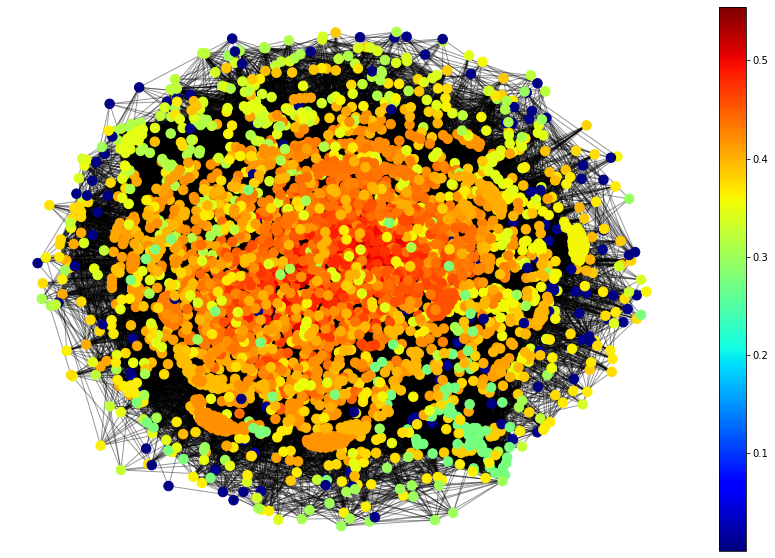

In [9]:
%%time
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.spring_layout(G,seed=123456,k=0.5)
# color of nodes
print("Calculating")
color = list(dict(nx.closeness_centrality(G)).values())
print("Ploting...")
# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax,node_size=90)

# draw labels
# nx.draw_networkx_labels(G, pos=pos,
#                         font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig("closeness_centrality.png")

## Betweness centrality

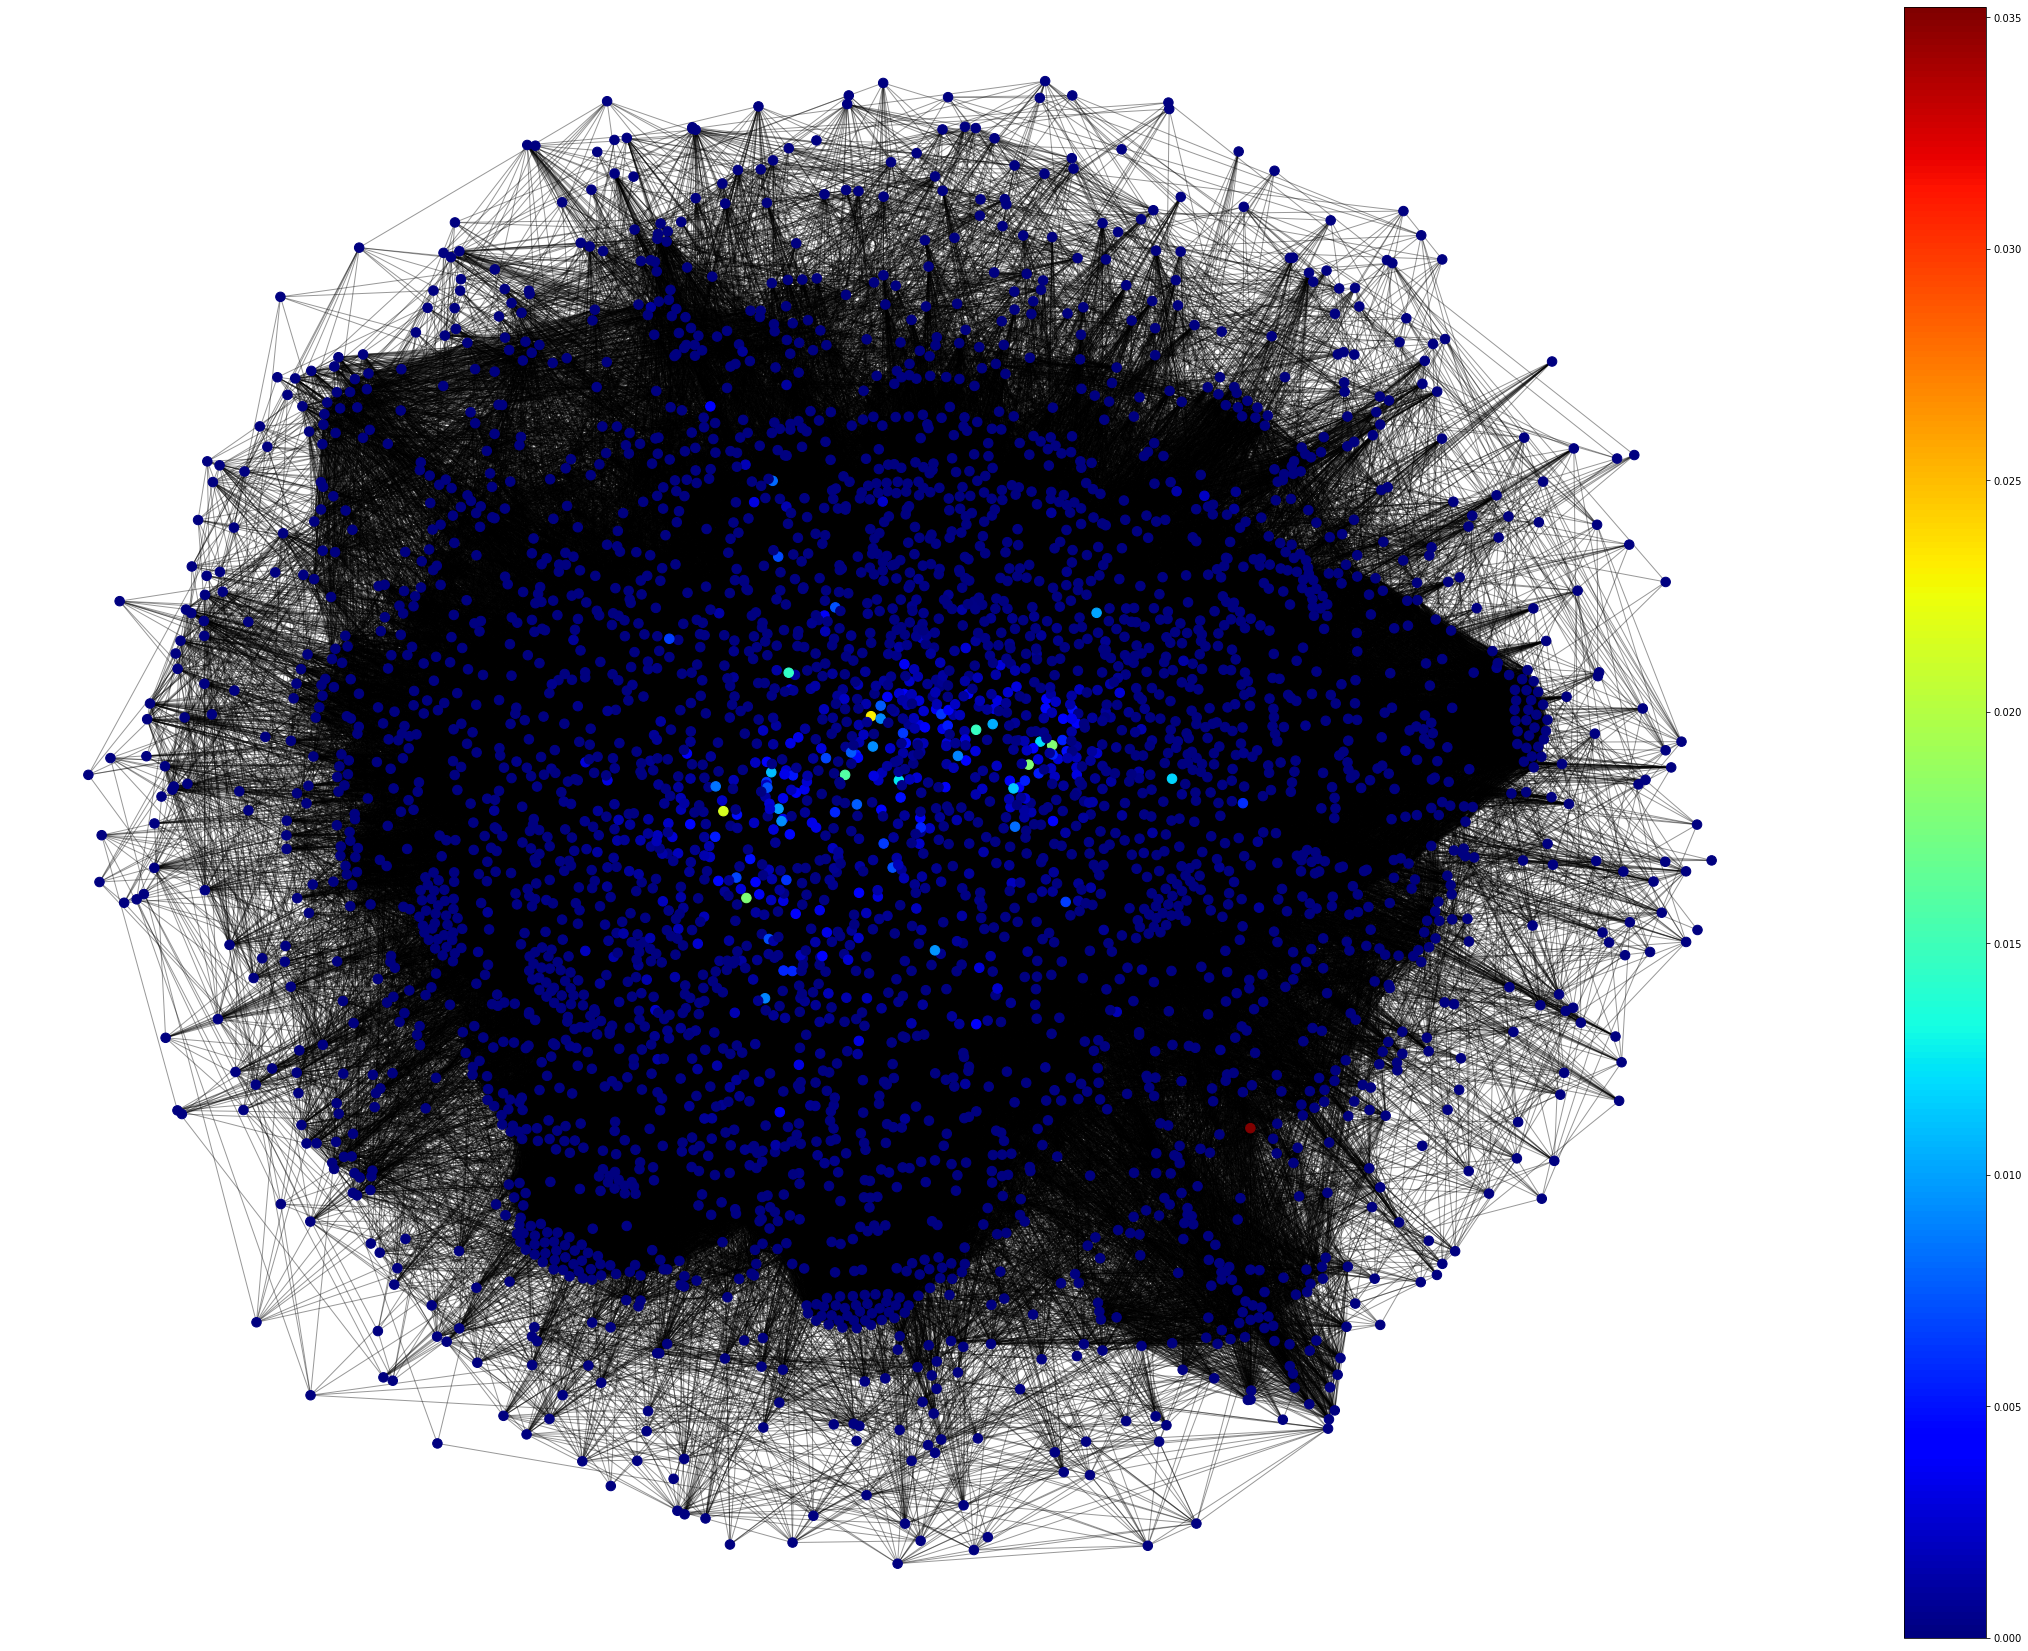

CPU times: user 6min 50s, sys: 1.35 s, total: 6min 51s
Wall time: 6min 55s


In [15]:
%%time

# the betwenness centrality of network(G)
fig, ax = plt.subplots(1,1,figsize=(40,30))

# layout position
#pos = nx.spring_layout(G,seed=42,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax,node_size=90)

# draw labels
# nx.draw_networkx_labels(G, pos=pos,
#                         font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.pnG', transparent=True,dpi=600)
plt.show()

## EIGVE CENTRALITY

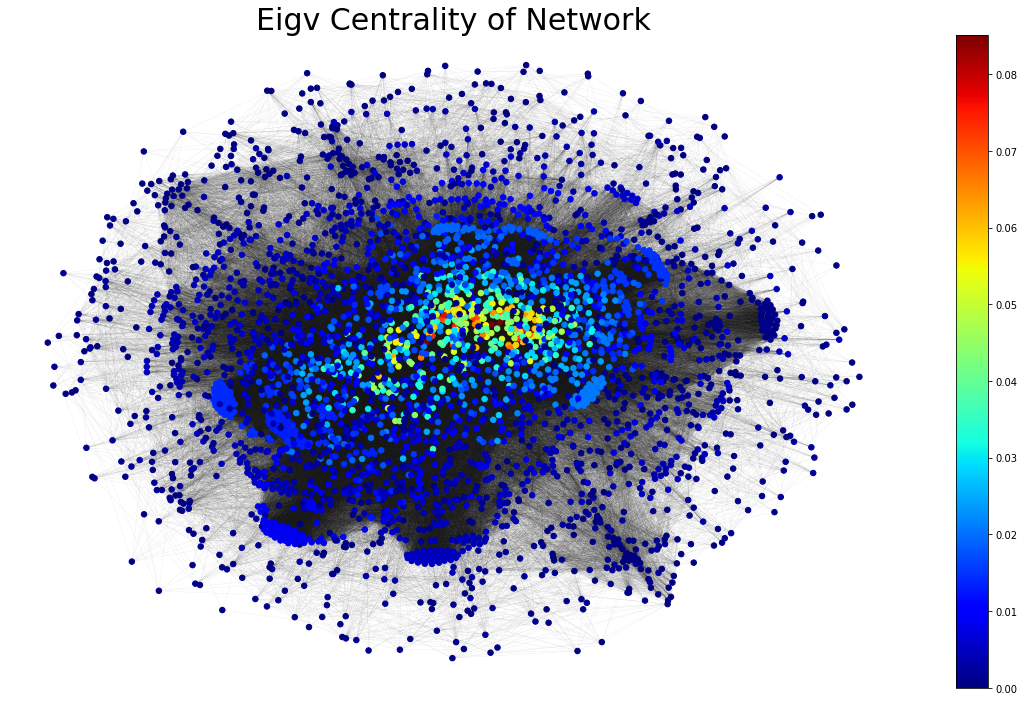

In [20]:
# the Eigvalue centrality of network(Gcc)
fig, ax = plt.subplots(1,1,figsize=(20,12))

#layout position
#pos = nx.spring_layout(g,seed=123456789,k=0.3)

# draw edges
color_eigv = list(dict(nx.eigenvector_centrality(G)).values())

nx.draw_networkx_edges(G,
                       pos=pos,
                       width=0.05,
                       alpha=0.6, 
                       ax=ax)
# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_eigv,
                 cmap=plt.cm.jet,
                 ax=ax,
                 node_size=30)

# draw labels
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax)

plt.title("Eigv Centrality of Network", fontsize = 30)
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('imgs/eigenvector_centrality.jpg',dpi=300)

## Degree Centrality

In [29]:
list(dict(nx.degree_centrality(G)).values())

[0.00835421888053467,
 0.16819827346143135,
 0.02199944305207463,
 0.00835421888053467,
 0.03564466722361459,
 0.00835421888053467,
 0.1668059036480089,
 0.2859927596769702,
 0.11695906432748537,
 0.013088276246170982,
 0.06766917293233082,
 0.09440267335004177,
 0.00835421888053467,
 0.09050403787245892,
 0.17014759120022277,
 0.18100807574491784,
 0.16819827346143135,
 0.2300194931773879,
 0.17153996101364521,
 0.06794764689501531,
 0.13784461152882205,
 0.040100250626566414,
 0.08270676691729323,
 0.00835421888053467,
 0.04065719855193539,
 0.16736285157337788,
 0.13227513227513227,
 0.05485937064884433,
 0.16485658590921748,
 0.24450013923698133,
 0.09718741297688666,
 0.08744082428292954,
 0.15984405458089668,
 0.24310776942355888,
 0.017265385686438317,
 0.017265385686438317,
 0.1317181843497633,
 0.14536340852130325,
 0.09774436090225563,
 0.16624895572263992,
 0.09830130882762461,
 0.1261487050960735,
 0.06906154274575327,
 0.2734614313561682,
 0.06739069896964633,
 0.033138401

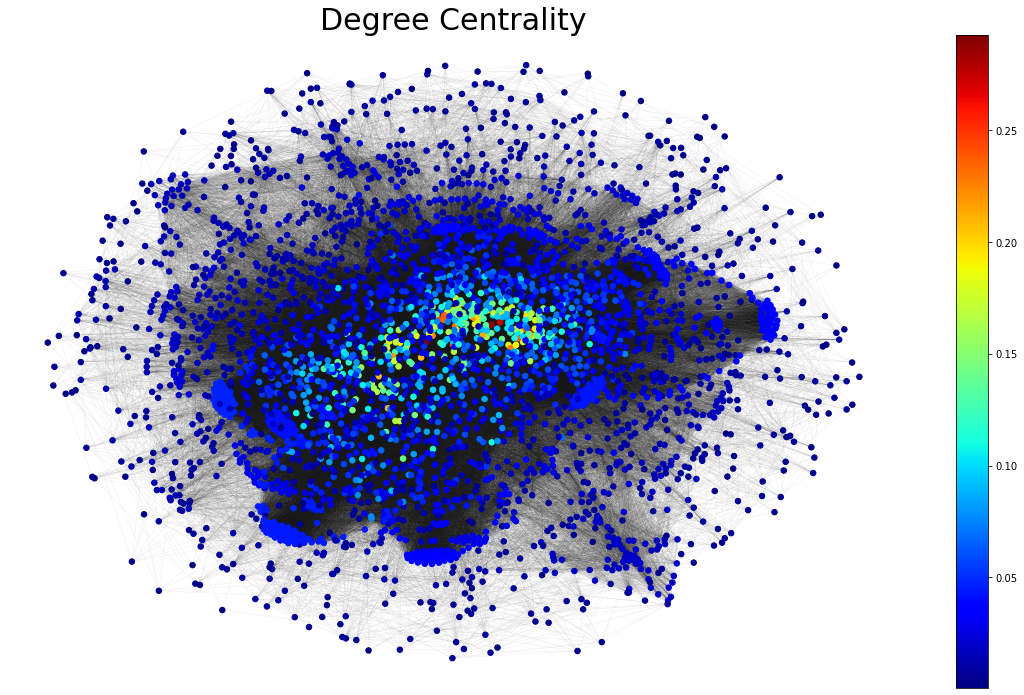

In [27]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

#layout position
#pos = nx.spring_layout(g,seed=123456789,k=0.3)

# draw edges
color_eigv = list(dict(nx.degree_centrality(G)).values())

nx.draw_networkx_edges(G,
                       pos=pos,
                       width=0.05,
                       alpha=0.6, 
                       ax=ax)
# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color_eigv,
                 cmap=plt.cm.jet,
                 ax=ax,
                 node_size=30)

# draw labels
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax)

plt.title("Degree Centrality", fontsize = 30)
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('imgs/degree_centrality.png',dpi=300)

## TOP 10 vertices parea cada metrica

In [12]:
%%time
#Degree, Closeness, Betweenness and Eigenvector Centrality
#TOP 10

sorted_betwn_centr = dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1],reverse=True))
sorted_degre_centrl = dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True))
sorted_closs_centrl = dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1],reverse=True))
sorted_eignv_centrl = dict(sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1],reverse=True))




CPU times: user 6min 19s, sys: 1.24 s, total: 6min 20s
Wall time: 6min 32s


In [104]:
sorted_eignv_centrl

{'Calvin Harris': 0.08504139368604098,
 'Rihanna': 0.08495910467910335,
 'Coldplay': 0.08486128454353914,
 'Drake': 0.08462418696324805,
 'Sam Smith': 0.07673406110618108,
 'Maroon 5': 0.07446913430275573,
 'Kanye West': 0.0741022385118486,
 'OneRepublic': 0.07387541262065685,
 'Imagine Dragons': 0.07334555355476477,
 'Jason Derulo': 0.07324444568490651,
 'Kendrick Lamar': 0.07287605409214033,
 'The Chainsmokers': 0.07264328846892983,
 'David Guetta': 0.07051602745683158,
 'Ed Sheeran': 0.06989225109085466,
 'Lil Wayne': 0.06951120536617651,
 'Nicki Minaj': 0.06933248737551753,
 'Miley Cyrus': 0.0690272748609325,
 'Big Sean': 0.06896283499138817,
 'Justin Timberlake': 0.0684031471566817,
 'The Weeknd': 0.06712437437334758,
 'Beyoncé': 0.06703360875608967,
 'Vance Joy': 0.0665567070531529,
 'Justin Bieber': 0.06581377726069729,
 'Flo Rida': 0.06544176448277274,
 'Snoop Dogg': 0.06442413406605786,
 'Pitbull': 0.06432726980716459,
 'Chris Brown': 0.06432535244896681,
 'Kid Cudi': 0.063416

# Histogram, PDF and CDF

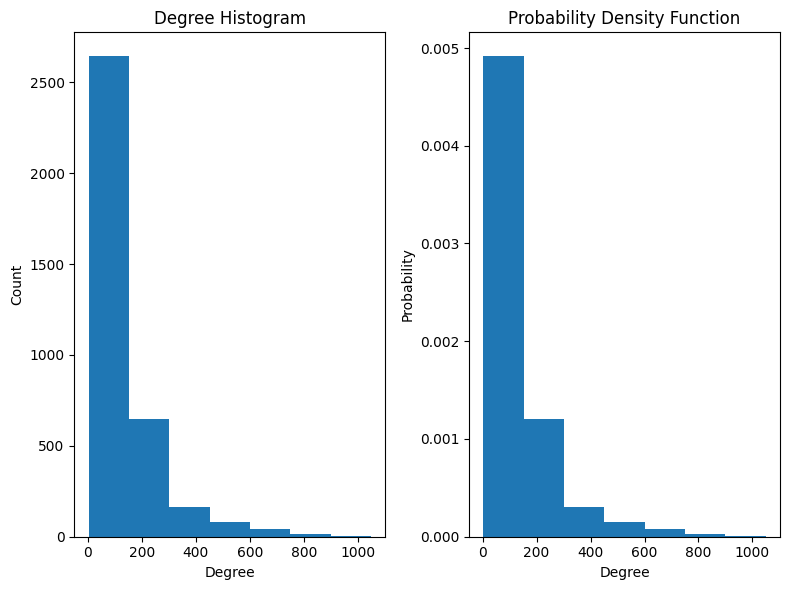

In [35]:
g = G
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.savefig('imgs/historagram.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

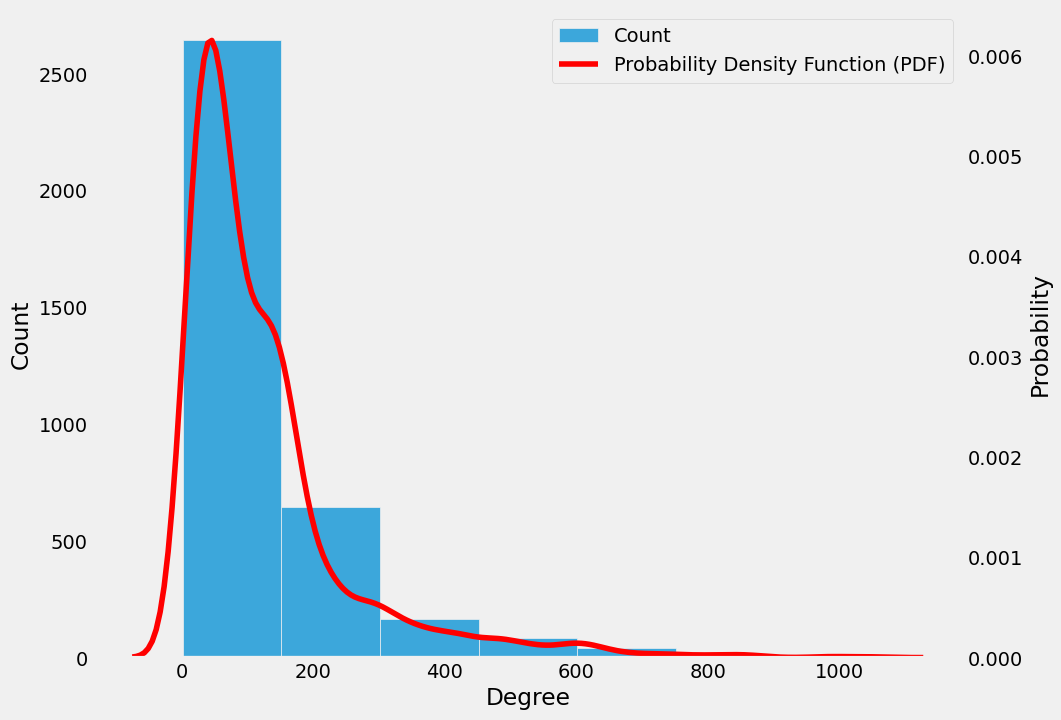

In [36]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('imgs/probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

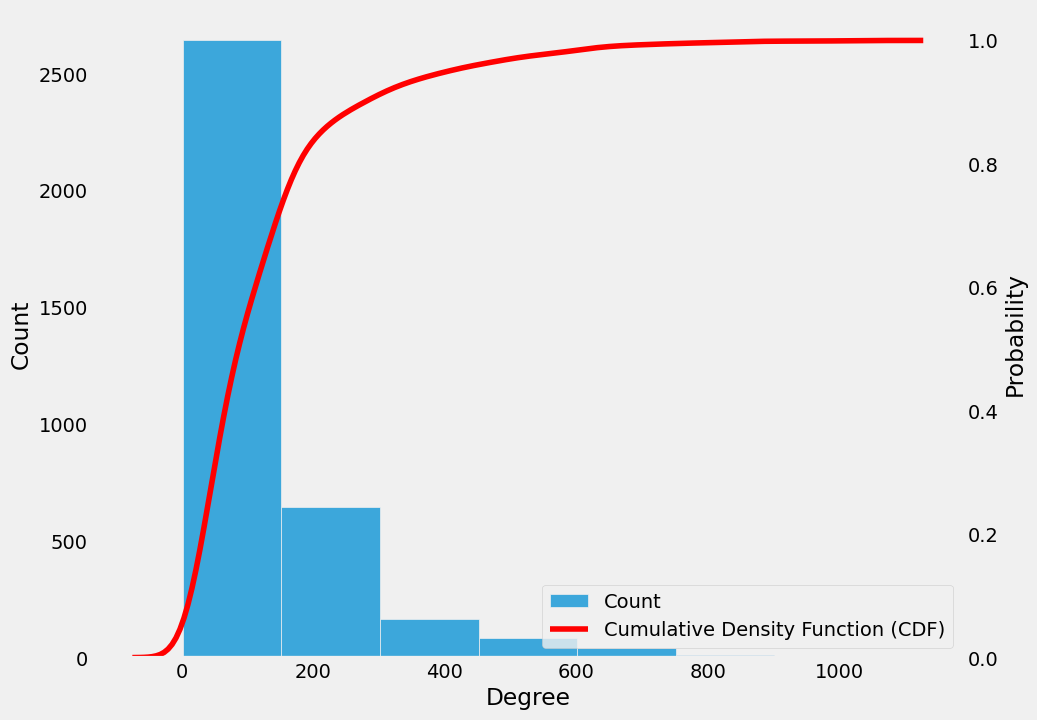

In [37]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('imgs/cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()


## ANALISE MULTIVARIADA

In [70]:

bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))
ec = pd.Series(nx.eigenvector_centrality(G))
cc = pd.Series(nx.closeness_centrality(G))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.sample(5)

Betweenness    Degree  EigenVector  Closeness
2752     0.000000  0.005848     0.000719   0.348645
2890     0.000000  0.015873     0.005520   0.402526
2430     0.000000  0.016987     0.003651   0.419112
1601     0.000303  0.050961     0.015383   0.448984
1695     0.000000  0.033138     0.000915   0.357873

In [ ]:
df.sample(5)

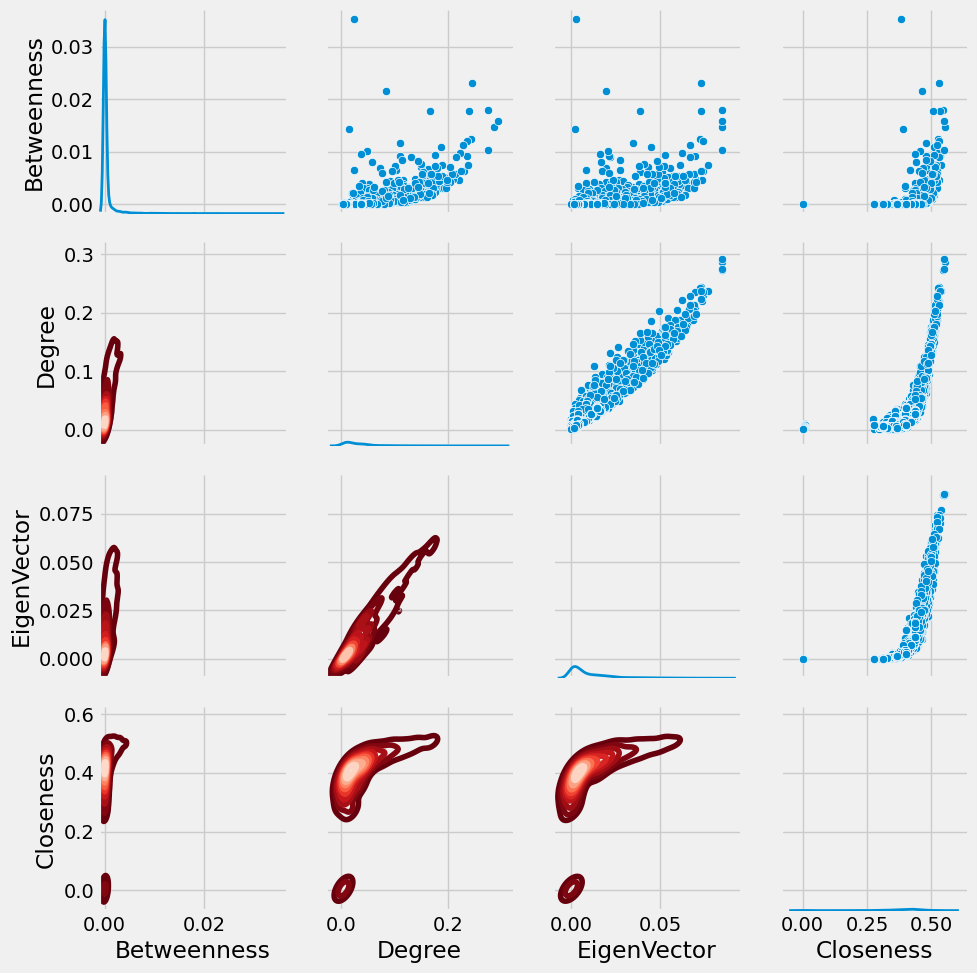

In [74]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('imgs/all.png',dpi=800,bbox_inches="tight")
plt.show()

# Core Decomposition

In [83]:
#G = g.copy()
G.remove_edges_from(nx.selfloop_edges(G))

set([v for k,v in nx.core_number(G).items()])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 134,
 135,
 136,
 138,
 140,
 147,
 156,
 158,
 168}

In [93]:
kcores = list(set([v for k,v in nx.core_number(g).items()]))
a = [node for node in list(nx.k_core(g, kcores[-1]))]
b = [node for node in list(nx.k_core(g, kcores[-2]))]


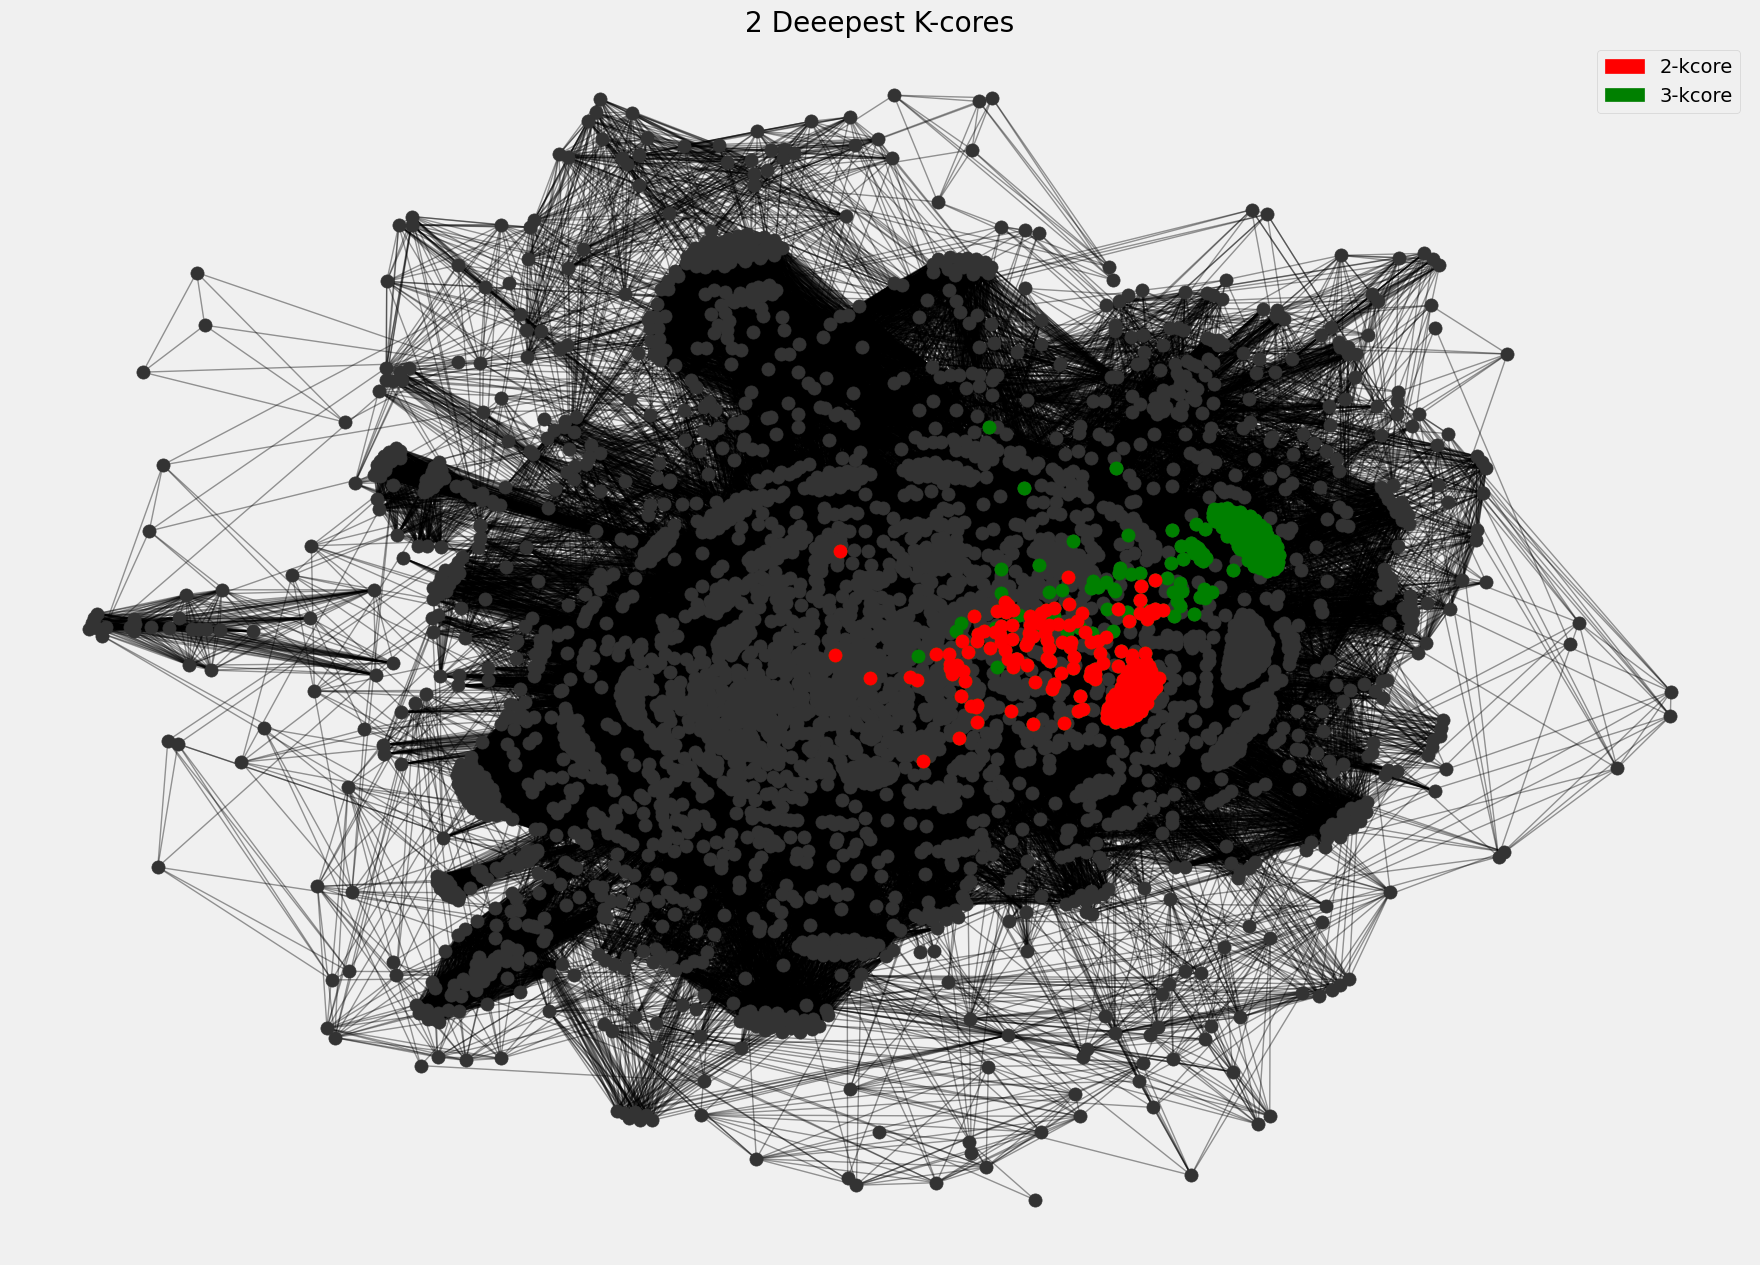

In [98]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
kcore1 = b
kcore2 = a
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color="#333333",node_size=90)

nodes = nx.draw_networkx_nodes(kcore1,
                 pos=pos,
                 node_color="green",node_size=90)

nodes = nx.draw_networkx_nodes(kcore2,
                 pos=pos,
                 node_color="red",node_size=90)

red_patch = mpatches.Patch(color='red', label='2-kcore')
green_patch = mpatches.Patch(color='green', label='3-kcore')
plt.legend(handles=[red_patch, green_patch])
plt.axis("off")
plt.title("2 Deeepest K-cores")
plt.savefig('imgs/k-core_sociopatterns.png')
plt.show()